In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('world_data_full_apply_nulos.csv', index_col=0)
df.sample(1)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
21,Bosnia and Herzegovina,64.0,BA,43.1,51.197,11.0,8.11,387.0,Sarajevo,21.848,104.9,0.6,BAM,1.27,42.7,1.05,2.004785e+10,NaN,23.3,5.0,Tuzla Canton,77.3,10.0,1.04,Bosnian,28.6,2.16,NaN,46.4,20.4,23.7,18.42,NaN,43.915886,17.679076,Europe


Calcula las siguientes estadísticas descriptivas para las variables numéricas:

    Media

    Mediana

    Desviación estándar

    Mínimo

    Máximo

In [ ]:
df_numericas = df.select_dtypes(include = np.number)
df_numericas.describe().T



,count,mean,std,min,25%,50%,75%,max
density,195.0,1.345045e+02,1.573068e+02,1.265000e+00,2.616850e+01,8.300000e+01,1.655000e+02,8.470000e+02
agricultural_land,188.0,3.911755e+01,2.178305e+01,6.000000e-01,2.170000e+01,3.960000e+01,5.537500e+01,8.260000e+01
land_area,165.0,2.552127e+02,2.583850e+02,0.000000e+00,4.127700e+01,1.484600e+02,4.300000e+02,9.640000e+02
armed_forces_size,166.0,1.037831e+02,1.671580e+02,0.000000e+00,1.025000e+01,2.850000e+01,1.282500e+02,9.360000e+02
birth_rate,189.0,2.021497e+01,9.945774e+00,5.900000e+00,1.130000e+01,1.795000e+01,2.875000e+01,4.608000e+01
calling_code,194.0,3.605464e+02,3.232364e+02,1.000000e+00,8.250000e+01,2.555000e+02,5.067500e+02,1.876000e+03
co2-emissions,183.0,1.259155e+02,1.817949e+02,1.016000e+00,7.600000e+00,3.447700e+01,1.850305e+02,7.279730e+02
cpi,175.0,1.441936e+02,5.478400e+01,9.903000e+01,1.136700e+02,1.247400e+02,1.559250e+02,5.509300e+02
cpi_change,179.0,6.722346e+00,2.445041e+01,-4.300000e+00,1.000000e+00,2.300000e+00,4.250000e+00,2.549000e+02
fertility_rate,188.0,2.698138e+00,1.282267e+00,9.800000e-01,1.705000e+00,2.245000e+00,3.597500e+00,6.910000e+00


In [17]:
df_numericas_agg = df_numericas.agg(['mean', 'median', 'std', 'min', 'max'])
df_numericas_agg.T

,mean,median,std,min,max
density,1.345045e+02,8.300000e+01,1.573068e+02,1.265000e+00,8.470000e+02
agricultural_land,3.911755e+01,3.960000e+01,2.178305e+01,6.000000e-01,8.260000e+01
land_area,2.552127e+02,1.484600e+02,2.583850e+02,0.000000e+00,9.640000e+02
armed_forces_size,1.037831e+02,2.850000e+01,1.671580e+02,0.000000e+00,9.360000e+02
birth_rate,2.021497e+01,1.795000e+01,9.945774e+00,5.900000e+00,4.608000e+01
calling_code,3.605464e+02,2.555000e+02,3.232364e+02,1.000000e+00,1.876000e+03
co2-emissions,1.259155e+02,3.447700e+01,1.817949e+02,1.016000e+00,7.279730e+02
cpi,1.441936e+02,1.247400e+02,5.478400e+01,9.903000e+01,5.509300e+02
cpi_change,6.722346e+00,2.300000e+00,2.445041e+01,-4.300000e+00,2.549000e+02
fertility_rate,2.698138e+00,2.245000e+00,1.282267e+00,9.800000e-01,6.910000e+00


Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.

In [32]:
df_group = df.groupby('country')['density'].max(numeric_only=True).sort_values(ascending=False)
df_group.head(1)

country
Palestinian National Authority    847.0
Name: density, dtype: float64

In [27]:
densidad_max = df.loc[df['density'].idxmax(), 'country']
densidad_max

'Palestinian National Authority'

In [38]:
densidad_min = df.loc[df['density'].idxmin(), 'country']
densidad_min

'Bangladesh'

In [34]:
df_group1 = df.groupby('country')['density'].min(numeric_only=True).sort_values(ascending=True)
df_group1.head(1)

country
Bangladesh    1.265
Name: density, dtype: float64

Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.

In [42]:
df.groupby('country')['birth_rate'].mean().sort_values(ascending=False).reset_index()

,country,birth_rate
0,Niger,46.08
1,Chad,42.17
2,Somalia,41.75
3,Mali,41.54
4,Democratic Republic of the Congo,41.18
...,...,...
190,Nauru,NaN
191,North Macedonia,NaN
192,Palestinian National Authority,NaN
193,Tuvalu,NaN


Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

In [ ]:
df.groupby('country')['infant_mortality'].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Afghanistan,1.0,47.9,NaN,47.9,47.9,47.9,47.9,47.9
Albania,1.0,7.8,NaN,7.8,7.8,7.8,7.8,7.8
Algeria,1.0,20.1,NaN,20.1,20.1,20.1,20.1,20.1
Andorra,1.0,2.7,NaN,2.7,2.7,2.7,2.7,2.7
Angola,1.0,51.6,NaN,51.6,51.6,51.6,51.6,51.6
...,...,...,...,...,...,...,...,...
Venezuela,1.0,21.4,NaN,21.4,21.4,21.4,21.4,21.4
Vietnam,1.0,16.5,NaN,16.5,16.5,16.5,16.5,16.5
Yemen,1.0,42.9,NaN,42.9,42.9,42.9,42.9,42.9


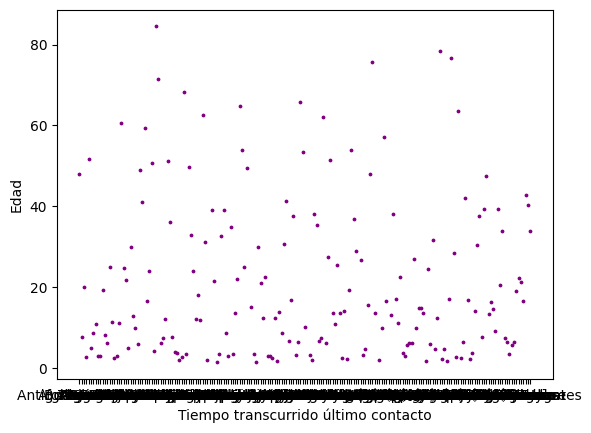

In [50]:
plt.scatter(x = "country", 
            y = "infant_mortality", 
            data = df,
            s=3, 
            c = "purple" )

# ponemos los nombres de los ejes
plt.xlabel("Tiempo transcurrido último contacto")
plt.ylabel("Edad");

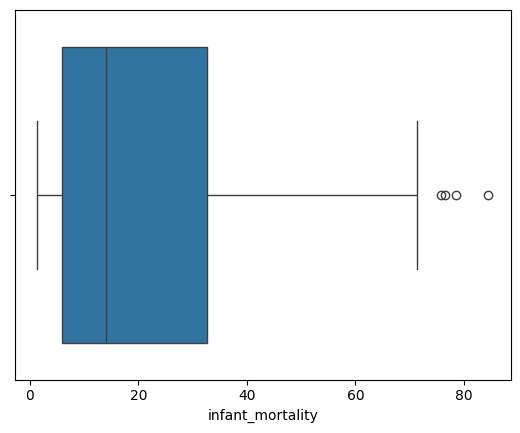

In [51]:
sns.boxplot(x = 'infant_mortality', data= df);

In [57]:
#Vamos a calcular la distancia entre Q3 y Q4. Se calcula con el rango intercuartílico que es el iqr (iqr es distancia entre Q1 y Q3) * 1,5
Q1 = np.nanpercentile(df['infant_mortality'], 25) #Usamos el nanpercentil en vez de percentile para que no coja valores nulos si los hay.
Q2 = np.nanpercentile(df['infant_mortality'], 50)
Q3 = np.nanpercentile(df['infant_mortality'], 75)

print(f'Q1: {Q1}, Q2: {Q2}, Q3: {Q3}')

Q1: 6.0, Q2: 14.0, Q3: 32.7


In [63]:
def categorizar_pais_mort_infantil(numero):
    
    if numero <= Q1:
        return "Mortalidad infantil baja"
    
    elif numero >= Q2 and numero <= Q3:
        return "Mortalidad infantil moderada"
    
    else:
        return "Mortalidad infantil alta"


In [64]:
df["mort_infantil_cat"] = df["infant_mortality"].apply(categorizar_pais_mort_infantil)
df[['country', 'mort_infantil_cat']].head()

,country,mort_infantil_cat
0,Afghanistan,Mortalidad infantil alta
1,Albania,Mortalidad infantil alta
2,Algeria,Mortalidad infantil moderada
3,Andorra,Mortalidad infantil baja
4,Angola,Mortalidad infantil alta
